,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


 Train Accuracy: 0.77
 Test Accuracy: 0.75


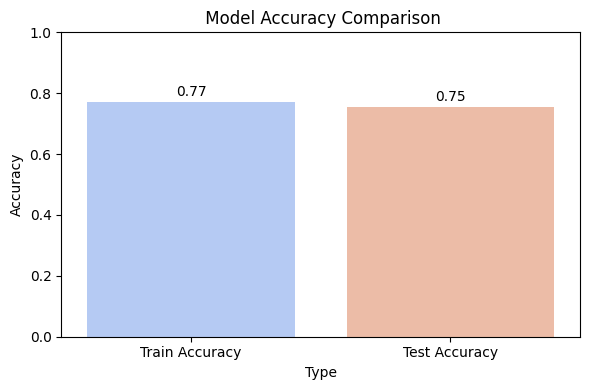

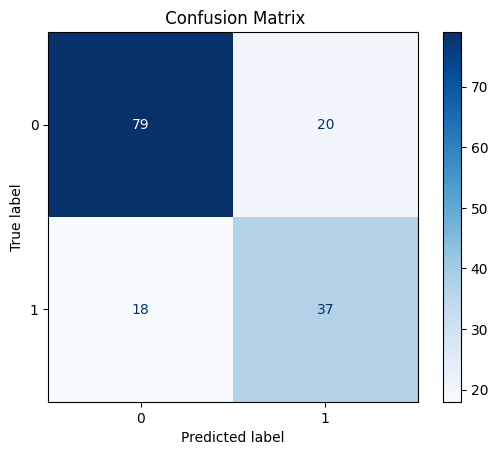

 Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [11]:
# Diabetes Prediction Model Analysis (Full Notebook)

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import joblib

# Load Dataset
df = pd.read_csv("data/diabetes.csv")
display(df.head(10))

# Prepare Data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Load Pre-trained Model and Scaler
model = joblib.load("models/diabetes_model.pkl")
scaler = joblib.load("models/scaler.pkl")

# Scale Data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate Accuracy
train_acc = model.score(X_train_scaled, y_train)
test_acc = model.score(X_test_scaled, y_test)

print(f" Train Accuracy: {train_acc:.2f}")
print(f" Test Accuracy: {test_acc:.2f}")

#Accuracy Comparison Bar Chart
acc_df = pd.DataFrame({
    "Type": ["Train Accuracy", "Test Accuracy"],
    "Accuracy": [train_acc, test_acc]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=acc_df, x="Type", y="Accuracy", hue="Type", legend=False, palette="coolwarm")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title(" Model Accuracy Comparison")

# Annotate bars
for i, row in acc_df.iterrows():
    plt.text(i, row.Accuracy + 0.02, f"{row.Accuracy:.2f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(" Confusion Matrix")
plt.show()

#  Classification Report
print(" Classification Report:\n")
print(classification_report(y_test, y_pred))
